In [995]:
import numpy as np
import glob
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [996]:
!git clone https://github.com/JeffSackmann/tennis_atp

fatal: destination path 'tennis_atp' already exists and is not an empty directory.


In [997]:
glob.glob('tennis_atp/atp_matches_[12][019][01298]*')

['tennis_atp\\atp_matches_1980.csv',
 'tennis_atp\\atp_matches_1981.csv',
 'tennis_atp\\atp_matches_1982.csv',
 'tennis_atp\\atp_matches_1983.csv',
 'tennis_atp\\atp_matches_1984.csv',
 'tennis_atp\\atp_matches_1985.csv',
 'tennis_atp\\atp_matches_1986.csv',
 'tennis_atp\\atp_matches_1987.csv',
 'tennis_atp\\atp_matches_1988.csv',
 'tennis_atp\\atp_matches_1989.csv',
 'tennis_atp\\atp_matches_1990.csv',
 'tennis_atp\\atp_matches_1991.csv',
 'tennis_atp\\atp_matches_1992.csv',
 'tennis_atp\\atp_matches_1993.csv',
 'tennis_atp\\atp_matches_1994.csv',
 'tennis_atp\\atp_matches_1995.csv',
 'tennis_atp\\atp_matches_1996.csv',
 'tennis_atp\\atp_matches_1997.csv',
 'tennis_atp\\atp_matches_1998.csv',
 'tennis_atp\\atp_matches_1999.csv',
 'tennis_atp\\atp_matches_2000.csv',
 'tennis_atp\\atp_matches_2001.csv',
 'tennis_atp\\atp_matches_2002.csv',
 'tennis_atp\\atp_matches_2003.csv',
 'tennis_atp\\atp_matches_2004.csv',
 'tennis_atp\\atp_matches_2005.csv',
 'tennis_atp\\atp_matches_2006.csv',
 

In [998]:
df = pd.concat([pd.read_csv(i) for i in glob.glob('tennis_atp/atp_matches_[12][019][01298]*')], axis=0)

Задача 2

In [999]:
df.dropna(inplace=True,subset= ['score'])

In [1000]:
df.tourney_date.apply(lambda x: '%.0f' % round(x,0))
df.loc[:, 'tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')

In [1001]:
df['year']= df['tourney_date'].dt.year

In [1002]:
df['sets_num'] = df['score'].map(lambda x: len(x.split()))

C:\Users\Марина\AppData\Local\Temp\ipykernel_8772\3099953859.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_set = df.groupby(df.tourney_date.dt.year).mean().sets_num


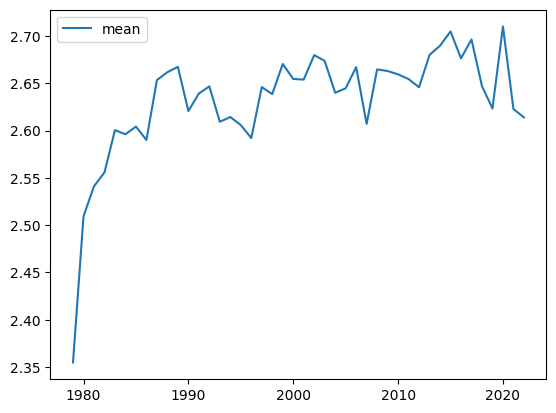

In [1003]:
years = df['year'].unique()
years.sort()

mean_set = df.groupby(df.tourney_date.dt.year).mean().sets_num

plt.plot(years, mean_set, label='mean')
plt.legend()

In [1004]:
df_early = df.loc[df['year'] < 2002].copy()
df_later = df.loc[df['year'] >= 2002].copy()

In [1005]:
print(df_early['sets_num'].mean())
print(df_later['sets_num'].mean())

2.615407647682615
2.658777088536212


In [1006]:
print(df_early.shape)
print(df_later.shape)

(80155, 51)
(62065, 51)


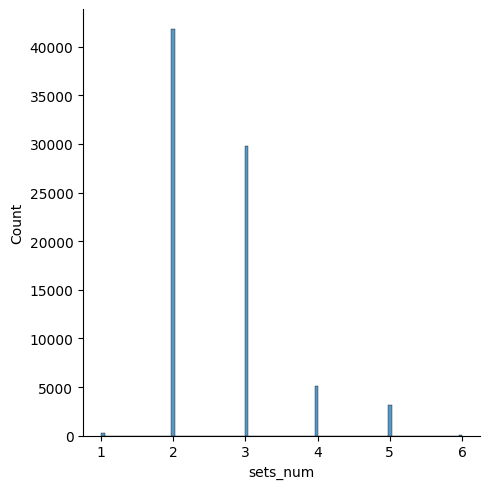

In [1007]:
sns.displot(df_early['sets_num'])

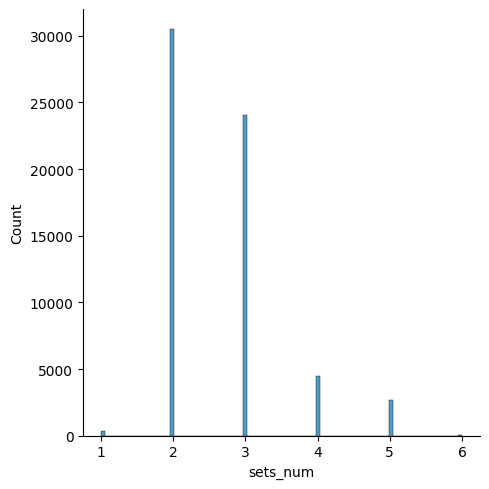

In [1008]:
sns.displot(df_later['sets_num'])

In [1009]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1)
    dfn = x.size-1 
    dfd = y.size-1 
    p = 1-stats.f.cdf(f, dfn, dfd) 
    return f, p

In [1010]:
f_test(df_early['sets_num'], df_later['sets_num'])

(0.9468569009811845, 0.9999999999997584)

In [1011]:
np.var(df_early['sets_num'], ddof=1), np.var(df_later['sets_num'], ddof=1)

(0.611886762421239, 0.6462293951569331)

Нулевая гипотеза F-test: дисперсии равны. p-val > 0.05 -> принимаем H0

In [1012]:
stats.ttest_ind(df_early['sets_num'], df_later['sets_num'])

Ttest_indResult(statistic=-10.244766862849726, pvalue=1.2741388564477138e-24)

T-test используем потому, что есть 2 выборки с нормальным распределением и удовлетворяют тесту Фишера
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

H0 - Две независимые выборки имеют одинаковые средние (ожидаемые значения).
P value < 0.05, гипотезу отвергаем

Задача 3

In [1013]:
df_early = df.loc[(df['year'] < 2002)&(df['best_of']==5)].copy()
df_later = df.loc[(df['year'] >= 2002)&(df['best_of']==5)].copy()

In [1014]:
df_early['best_of'].value_counts()

5    16211
Name: best_of, dtype: int64

In [1015]:
df_later['best_of'].value_counts()

5    14273
Name: best_of, dtype: int64

In [1016]:
print(df_early['sets_num'].mean())
print(df_later['sets_num'].mean())

3.6916291407069273
3.6646815665942687


In [1017]:
print(df_early.shape)
print(df_later.shape)

(16211, 51)
(14273, 51)


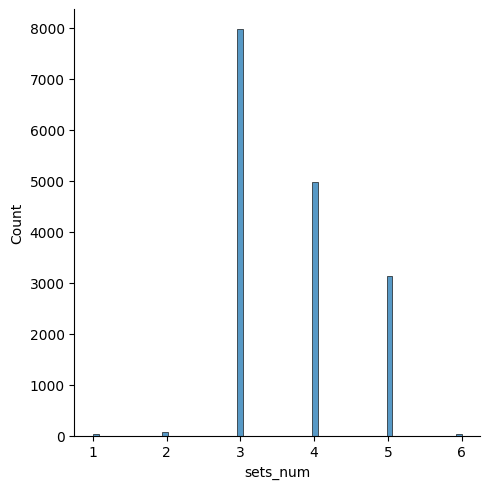

In [1018]:
sns.displot(df_early['sets_num'])

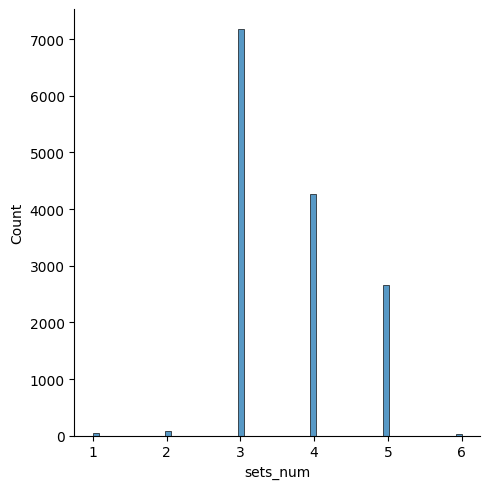

In [1019]:
sns.displot(df_later['sets_num'])

In [1020]:
f_test(df_early['sets_num'], df_later['sets_num'])

(0.9846156909921446, 0.8303515672363776)

In [1021]:
np.var(df_early['sets_num'], ddof=1), np.var(df_later['sets_num'], ddof=1)

(0.6334024722019699, 0.6432991856586442)

In [1022]:
stats.ttest_ind(df_early['sets_num'], df_later['sets_num'])

Ttest_indResult(statistic=2.9391622951833747, pvalue=0.003293474676183332)

T-test используем потому, что есть 2 выборки с нормальным распределением и удовлетворяют тесту Фишера
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

H0 - Две независимые выборки имеют одинаковые средние (ожидаемые значения).
P value < 0.05, гипотезу отвергаем

Задача 4

In [1023]:
df.dropna(inplace=True,subset= ['w_bpSaved', 'w_bpFaced', 'l_bpSaved', 'l_bpFaced'])

In [1024]:
df[['winner_name', 'w_bpSaved', 'w_bpFaced', 'loser_name','l_bpSaved', 'l_bpFaced']]

,winner_name,w_bpSaved,w_bpFaced,loser_name,l_bpSaved,l_bpFaced
0,Magnus Larsson,2.0,4.0,Boris Becker,6.0,8.0
1,Slobodan Zivojinovic,9.0,10.0,Mark Kratzmann,1.0,2.0
2,Patrik Kuhnen,1.0,1.0,Veli Paloheimo,4.0,8.0
3,Todd Woodbridge,3.0,3.0,Guillaume Raoux,5.0,8.0
4,Udo Riglewski,7.0,8.0,Sergi Bruguera,4.0,8.0
...,...,...,...,...,...,...
2911,Aristotelis Thanos,5.0,5.0,Blaise Bicknell,11.0,13.0
2912,Petros Tsitsipas,9.0,12.0,Rowland Phillips,4.0,8.0
2913,Hong Kit Jack Wong,3.0,7.0,Alexis Klegou,6.0,10.0
2914,Coleman Wong,6.0,8.0,Delmas Ntcha,5.0,9.0


3 Игрока

In [1025]:
safin_win = df[(df['winner_name'] =='Marat Safin') & ~((df['w_bpSaved'] == 0) & (df['w_bpFaced'] == 0))].copy()
safin_lose = df[(df['loser_name'] =='Marat Safin') & ~((df['l_bpSaved'] == 0) & (df['l_bpFaced'] == 0))].copy()


In [1026]:
federer_win = df[(df['winner_name'] =='Roger Federer') & ~((df['w_bpSaved'] == 0) & (df['w_bpFaced'] == 0))].copy()
federer_lose = df[(df['loser_name'] =='Roger Federer') & ~((df['l_bpSaved'] == 0) & (df['l_bpFaced'] == 0))].copy()

In [1027]:
sampras_win = df[(df['winner_name'] =='Pete Sampras') & ~((df['w_bpSaved'] == 0) & (df['w_bpFaced'] == 0))].copy()
sampras_lose= df[(df['loser_name'] =='Pete Sampras') & ~((df['l_bpSaved'] == 0) & (df['l_bpFaced'] == 0))].copy()

Игрок 1

In [1028]:
safin_win[['w_bpSaved', 'w_bpFaced', 'year']].groupby(by='year').sum().reset_index()

,year,w_bpSaved,w_bpFaced
0,1998,67.0,98.0
1,1999,120.0,191.0
2,2000,228.0,336.0
3,2001,168.0,244.0
4,2002,185.0,268.0
5,2003,48.0,69.0
6,2004,150.0,217.0
7,2005,96.0,141.0
8,2006,96.0,138.0
9,2007,103.0,152.0


<AxesSubplot: >

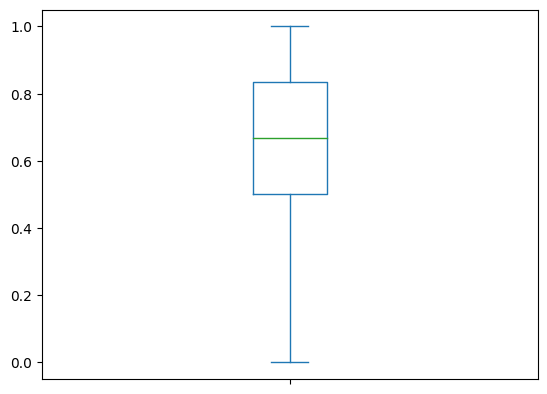

In [1029]:
(safin_win['w_bpSaved']/safin_win['w_bpFaced']).plot.box()

In [1030]:
safin_lose[['l_bpSaved', 'l_bpFaced']]

,l_bpSaved,l_bpFaced
3525,4.0,6.0
564,3.0,5.0
1081,8.0,12.0
1683,2.0,6.0
1912,7.0,11.0
...,...,...
2083,4.0,8.0
2236,8.0,11.0
2342,1.0,4.0
2487,1.0,4.0


<AxesSubplot: >

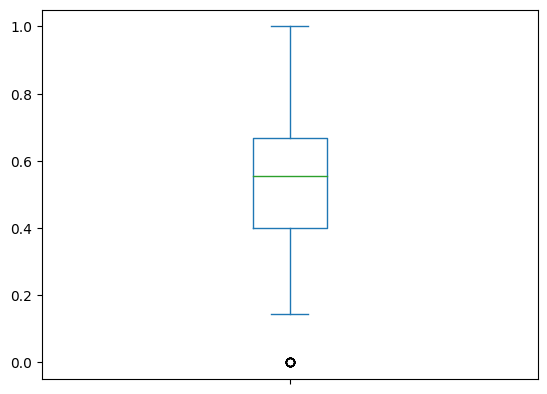

In [1031]:
(safin_lose['l_bpSaved']/safin_lose['l_bpFaced']).plot.box()

Доля выигранных брейк-пойнтов по годам в выигранных матчах (Сафин)

In [1032]:
safin_win = safin_win[['w_bpSaved', 'w_bpFaced', 'year']].groupby(by='year').sum().reset_index()

safin_bPwin = pd.concat([(safin_win['w_bpSaved']/safin_win['w_bpFaced']).reset_index(drop=True), 
                         pd.Series(np.ones_like(safin_win['w_bpSaved']), name='win')], axis=1)
safin_bPwin

,0,win
0,0.683673,1.0
1,0.628272,1.0
2,0.678571,1.0
3,0.688525,1.0
4,0.690299,1.0
5,0.695652,1.0
6,0.691244,1.0
7,0.680851,1.0
8,0.695652,1.0
9,0.677632,1.0


In [1033]:
safin_bPwin = safin_bPwin.rename(columns={0: 'BP_won'})

Доля выигранных брейк-поинтов по годам в проигранных матчах (Сафин). Убрали 1 год, чтобы была одинаковая размерность

In [1034]:
safin_lose = safin_lose[['l_bpSaved', 'l_bpFaced', 'year']].groupby(by='year').sum().reset_index().iloc[1:]
safin_bPlose = pd.concat([(safin_lose['l_bpSaved']/safin_lose['l_bpFaced']).reset_index(drop=True), 
                       pd.Series(np.zeros_like(safin_lose['l_bpSaved']), name='win')], axis=1)
safin_bPlose

,0,win
0,0.545455,0.0
1,0.488688,0.0
2,0.553073,0.0
3,0.512658,0.0
4,0.589595,0.0
5,0.589474,0.0
6,0.582278,0.0
7,0.545455,0.0
8,0.616740,0.0
9,0.597122,0.0


In [1035]:
safin_bPlose = safin_bPlose.rename(columns={0: 'BP_won'})

In [1036]:
BP_data_safin = pd.concat([safin_bPwin, safin_bPlose])

In [1037]:
BP_data_safin = BP_data_safin.reset_index(drop=True)
BP_data_safin

,BP_won,win
0,0.683673,1.0
1,0.628272,1.0
2,0.678571,1.0
3,0.688525,1.0
4,0.690299,1.0
5,0.695652,1.0
6,0.691244,1.0
7,0.680851,1.0
8,0.695652,1.0
9,0.677632,1.0


<AxesSubplot: xlabel='win', ylabel='BP_won'>

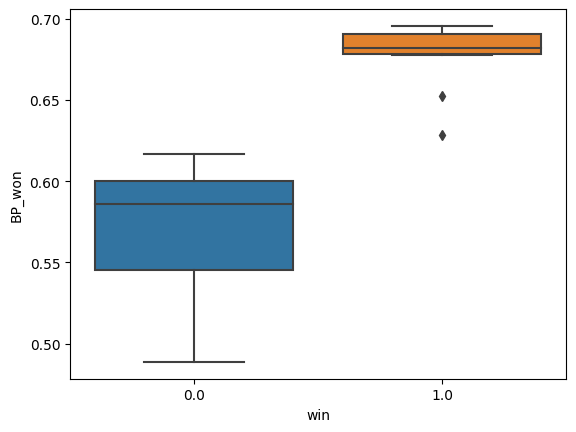

In [1038]:
sns.boxplot(data=BP_data_safin, x='win', y='BP_won')

In [1039]:
crosstab_safin = pd.concat([safin_bPwin['BP_won'].rename('win'), 
           safin_bPlose['BP_won'].rename('lose')], 
          axis=1)
crosstab_safin

,win,lose
0,0.683673,0.545455
1,0.628272,0.488688
2,0.678571,0.553073
3,0.688525,0.512658
4,0.690299,0.589595
5,0.695652,0.589474
6,0.691244,0.582278
7,0.680851,0.545455
8,0.695652,0.616740
9,0.677632,0.597122


In [1040]:
stats.chi2_contingency(crosstab_safin)

(0.014163074363582885,
 0.9999999999999948,
 11,
 array([[0.66813018, 0.56099783],
        [0.60715784, 0.50980219],
        [0.66949785, 0.5621462 ],
        [0.65293971, 0.5482431 ],
        [0.69572552, 0.58416836],
        [0.69856952, 0.58655633],
        [0.69226228, 0.58126044],
        [0.66659598, 0.55970963],
        [0.71339101, 0.59900125],
        [0.69293152, 0.58182236],
        [0.70056317, 0.58823031],
        [0.68571252, 0.57576091]]))

In [1041]:
chisq_stats_safin = stats.chi2_contingency(crosstab_safin, correction=False)[0]

In [1042]:
n = np.sum(crosstab_safin)
n

win     8.143477
lose    6.837699
dtype: float64

In [1043]:
n = n.sum()

In [1044]:
minshape_safin = min(crosstab_safin.shape)-1

In [1045]:
cramer_safin = np.sqrt((chisq_stats_safin/n)/minshape_safin)
cramer_safin

0.030747217077297894

меньше 0.05 -> cвязь между победными матчами и проигранными слабая (очень слабая)

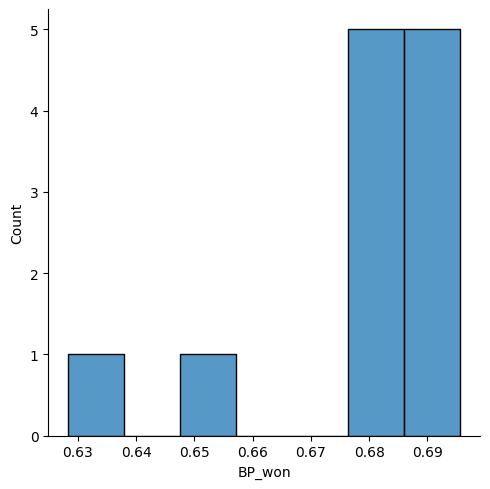

In [1046]:
sns.displot(safin_bPwin['BP_won'])

Игрок 2

In [1047]:
federer_win[['w_bpSaved', 'w_bpFaced', 'year']].groupby(by='year').sum().reset_index()

,year,w_bpSaved,w_bpFaced
0,1998,5.0,5.0
1,1999,21.0,37.0
2,2000,113.0,152.0
3,2001,215.0,289.0
4,2002,144.0,194.0
5,2003,169.0,239.0
6,2004,182.0,245.0
7,2005,190.0,278.0
8,2006,248.0,345.0
9,2007,170.0,249.0


<AxesSubplot: >

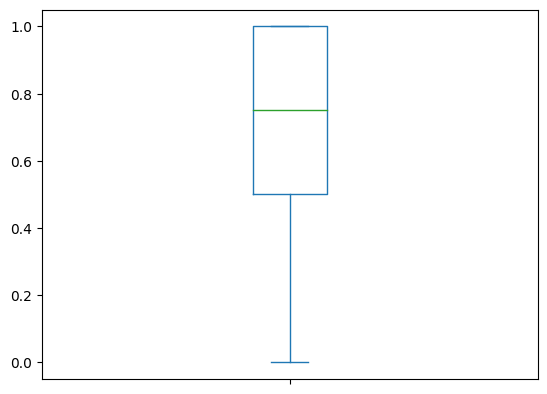

In [1048]:
(federer_win['w_bpSaved']/federer_win['w_bpFaced']).plot.box()

In [1049]:
federer_lose[['l_bpSaved', 'l_bpFaced']]

,l_bpSaved,l_bpFaced
2030,1.0,5.0
3100,7.0,10.0
3108,4.0,8.0
275,5.0,10.0
493,10.0,16.0
...,...,...
292,7.0,11.0
276,2.0,5.0
1079,7.0,10.0
1207,12.0,15.0


<AxesSubplot: >

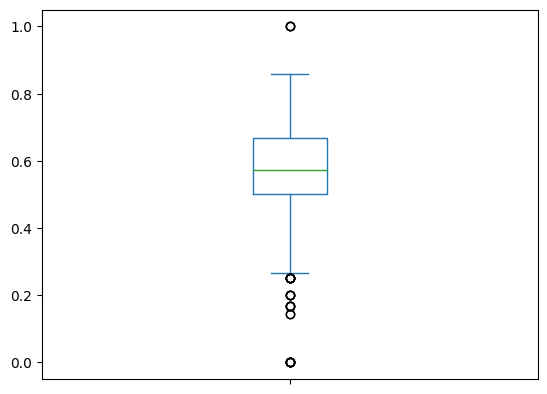

In [1050]:
(federer_lose['l_bpSaved']/federer_lose['l_bpFaced']).plot.box()

Доля выигранных брейк-пойнтов по годам в выигранных матчах (Федерер)

In [1051]:
federer_win = federer_win[['w_bpSaved', 'w_bpFaced', 'year']].groupby(by='year').sum().reset_index()
federer_bPwin = pd.concat([(federer_win['w_bpSaved']/federer_win['w_bpFaced']).reset_index(drop=True), 
                         pd.Series(np.ones_like(federer_win['w_bpSaved']), name='win')], axis=1)
federer_bPwin

,0,win
0,1.000000,1.0
1,0.567568,1.0
2,0.743421,1.0
3,0.743945,1.0
4,0.742268,1.0
5,0.707113,1.0
6,0.742857,1.0
7,0.683453,1.0
8,0.718841,1.0
9,0.682731,1.0


In [1052]:
federer_bPwin = federer_bPwin.rename(columns={0: 'BP_won'})

Доля выигранных брейк-поинтов по годам в проигранных матчах (Федерер).

In [1053]:
federer_lose = federer_lose[['l_bpSaved', 'l_bpFaced', 'year']].groupby(by='year').sum().reset_index()
federer_bPlose = pd.concat([(federer_lose['l_bpSaved']/federer_lose['l_bpFaced']).reset_index(drop=True), 
                       pd.Series(np.zeros_like(federer_lose['l_bpSaved']), name='win')], axis=1)
federer_bPlose

,0,win
0,0.521739,0.0
1,0.594406,0.0
2,0.589286,0.0
3,0.544910,0.0
4,0.591837,0.0
5,0.570370,0.0
6,0.625000,0.0
7,0.387755,0.0
8,0.555556,0.0
9,0.559322,0.0


In [1054]:
federer_bPlose = federer_bPlose.rename(columns={0: 'BP_won'})

In [1055]:
BP_data_federer = pd.concat([federer_bPwin, federer_bPlose])

In [1056]:
BP_data_federer = BP_data_federer.reset_index(drop=True)
BP_data_federer

,BP_won,win
0,1.000000,1.0
1,0.567568,1.0
2,0.743421,1.0
3,0.743945,1.0
4,0.742268,1.0
5,0.707113,1.0
6,0.742857,1.0
7,0.683453,1.0
8,0.718841,1.0
9,0.682731,1.0


<AxesSubplot: xlabel='win', ylabel='BP_won'>

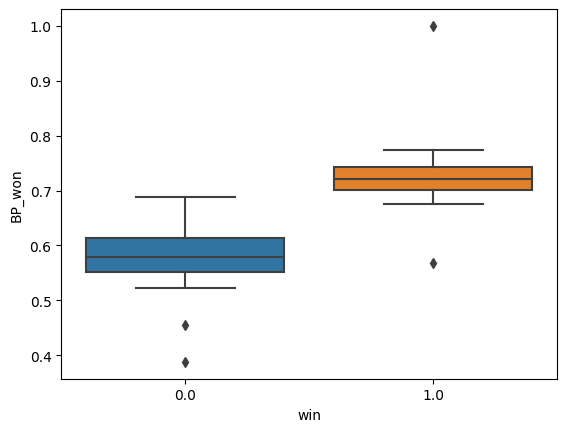

In [1057]:
sns.boxplot(data=BP_data_federer, x='win', y='BP_won')

In [1058]:
crosstab_federer = pd.concat([federer_bPwin['BP_won'].rename('win'), 
           federer_bPlose['BP_won'].rename('lose')], 
          axis=1)
crosstab_federer

,win,lose
0,1.000000,0.521739
1,0.567568,0.594406
2,0.743421,0.589286
3,0.743945,0.544910
4,0.742268,0.591837
5,0.707113,0.570370
6,0.742857,0.625000
7,0.683453,0.387755
8,0.718841,0.555556
9,0.682731,0.559322


In [1059]:
stats.chi2_contingency(crosstab_federer)

(0.18227148927920653,
 1.0,
 23,
 array([[0.84944692, 0.67229221],
        [0.64862269, 0.51335048],
        [0.74392755, 0.58877922],
        [0.71944904, 0.56940578],
        [0.74470793, 0.58939685],
        [0.71310139, 0.56438195],
        [0.76354877, 0.60430838],
        [0.59795704, 0.4732513 ],
        [0.71137809, 0.56301805],
        [0.69332387, 0.54872909],
        [0.74611712, 0.59051215],
        [0.72713257, 0.57548689],
        [0.72564184, 0.57430706],
        [0.71187958, 0.56341495],
        [0.70852905, 0.56076319],
        [0.73468477, 0.58146406],
        [0.76747887, 0.60741884],
        [0.74862907, 0.59250023],
        [0.70228677, 0.55582275],
        [0.64665942, 0.51179665],
        [0.74756872, 0.59166102],
        [0.75653068, 0.59875393],
        [0.73799444, 0.58408348],
        [0.76133366, 0.60255523]]))

In [1060]:
chisq_stats_federer = stats.chi2_contingency(crosstab_federer, correction=False)[0]

In [1061]:
n = np.sum(crosstab_federer)
n

win     17.407930
lose    13.777454
dtype: float64

In [1062]:
n = n.sum()

In [1063]:
minshape_federer = min(crosstab_federer.shape)-1

In [1064]:
cramer_federer = np.sqrt((chisq_stats_federer/n)/minshape_federer)
cramer_federer

0.07645111540921305

0.07 > 0.05 - связь слабая

Игрок 3

In [1065]:
sampras_win[['w_bpSaved', 'w_bpFaced', 'year']].groupby(by='year').sum().reset_index()

,year,w_bpSaved,w_bpFaced
0,1991,126.0,169.0
1,1992,204.0,305.0
2,1993,198.0,282.0
3,1994,187.0,267.0
4,1995,206.0,273.0
5,1996,173.0,233.0
6,1997,99.0,138.0
7,1998,115.0,173.0
8,1999,100.0,136.0
9,2000,120.0,149.0


<AxesSubplot: >

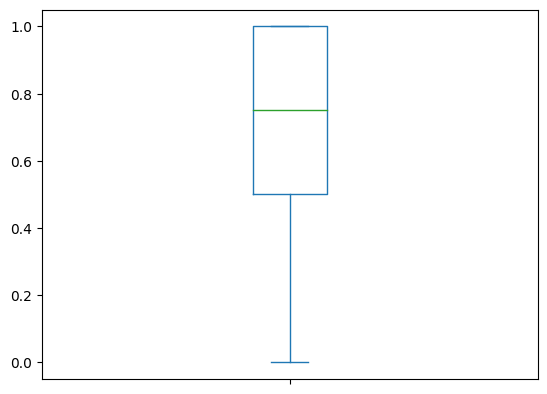

In [1066]:
(sampras_win['w_bpSaved']/sampras_win['w_bpFaced']).plot.box()

In [1067]:
sampras_lose[['l_bpSaved', 'l_bpFaced']]

,l_bpSaved,l_bpFaced
504,5.0,9.0
544,2.0,4.0
778,4.0,7.0
965,4.0,7.0
1467,3.0,8.0
...,...,...
2298,7.0,12.0
2641,10.0,14.0
2672,0.0,2.0
2674,6.0,10.0


<AxesSubplot: >

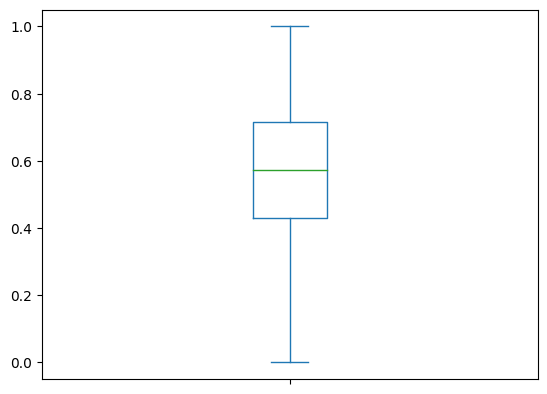

In [1068]:
(sampras_lose['l_bpSaved']/sampras_lose['l_bpFaced']).plot.box()

Доля выигранных брейк-пойнтов по годам в выигранных матчах (Сампрас)

In [1069]:
sampras_win = sampras_win[['w_bpSaved', 'w_bpFaced', 'year']].groupby(by='year').sum().reset_index()
sampras_bPwin = pd.concat([(sampras_win['w_bpSaved']/sampras_win['w_bpFaced']).reset_index(drop=True), 
                         pd.Series(np.ones_like(sampras_win['w_bpSaved']), name='win')], axis=1)
sampras_bPwin

,0,win
0,0.745562,1.0
1,0.668852,1.0
2,0.702128,1.0
3,0.700375,1.0
4,0.754579,1.0
5,0.742489,1.0
6,0.717391,1.0
7,0.664740,1.0
8,0.735294,1.0
9,0.805369,1.0


In [1070]:
sampras_bPwin = sampras_bPwin.rename(columns={0: 'BP_won'})

Доля выигранных брейк-поинтов по годам в проигранных матчах (Сампрас).

In [1071]:
sampras_lose = sampras_lose[['l_bpSaved', 'l_bpFaced', 'year']].groupby(by='year').sum().reset_index()
sampras_bPlose = pd.concat([(sampras_lose['l_bpSaved']/sampras_lose['l_bpFaced']).reset_index(drop=True), 
                       pd.Series(np.zeros_like(sampras_lose['l_bpSaved']), name='win')], axis=1)
sampras_bPlose

,0,win
0,0.577465,0.0
1,0.526316,0.0
2,0.645833,0.0
3,0.571429,0.0
4,0.625000,0.0
5,0.627907,0.0
6,0.583333,0.0
7,0.598425,0.0
8,0.593220,0.0
9,0.609756,0.0


In [1072]:
sampras_bPlose = sampras_bPlose.rename(columns={0: 'BP_won'})

In [1073]:
BP_data_sampras = pd.concat([sampras_bPwin, sampras_bPlose])

In [1074]:
BP_data_sampras = BP_data_sampras.reset_index(drop=True)
BP_data_sampras

,BP_won,win
0,0.745562,1.0
1,0.668852,1.0
2,0.702128,1.0
3,0.700375,1.0
4,0.754579,1.0
5,0.742489,1.0
6,0.717391,1.0
7,0.664740,1.0
8,0.735294,1.0
9,0.805369,1.0


<AxesSubplot: xlabel='win', ylabel='BP_won'>

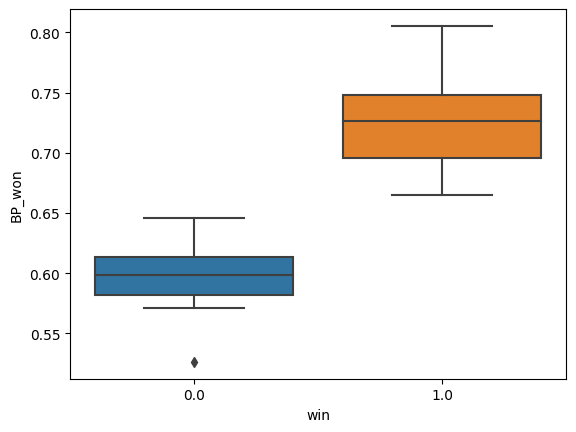

In [1075]:
sns.boxplot(data=BP_data_sampras, x='win', y='BP_won')

In [1076]:
crosstab_sampras = pd.concat([sampras_bPwin['BP_won'].rename('win'), 
           sampras_bPlose['BP_won'].rename('lose')], 
          axis=1)
crosstab_sampras

,win,lose
0,0.745562,0.577465
1,0.668852,0.526316
2,0.702128,0.645833
3,0.700375,0.571429
4,0.754579,0.625000
5,0.742489,0.627907
6,0.717391,0.583333
7,0.664740,0.598425
8,0.735294,0.593220
9,0.805369,0.609756


In [1077]:
stats.chi2_contingency(crosstab_sampras)

(0.01455430371820789,
 0.999999999999994,
 11,
 array([[0.72473986, 0.59828706],
        [0.65470026, 0.54046799],
        [0.73839847, 0.60956252],
        [0.69668   , 0.5751231 ],
        [0.75571834, 0.62386041],
        [0.75068826, 0.61970798],
        [0.71252291, 0.58820173],
        [0.69194819, 0.57121689],
        [0.72774587, 0.60076859],
        [0.77519031, 0.63993491],
        [0.70675828, 0.58344291],
        [0.7462918 , 0.61607862]]))

In [1078]:
chisq_stats_sampras = stats.chi2_contingency(crosstab_sampras, correction=False)[0]

In [1079]:
n = np.sum(crosstab_sampras)
n

win     8.681383
lose    7.166653
dtype: float64

In [1080]:
n = n.sum()

In [1081]:
minshape_sampras = min(crosstab_sampras.shape)-1

In [1082]:
cramer_sampras = np.sqrt((chisq_stats_sampras/n)/minshape_sampras)
cramer_sampras

0.030304561350308432

0.03 < - 0.05 - связи нет или она очень слабая

тест Манна Уитни для проверки значимости разницы в средних для проигранных и выигранных матчей
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

H0 - распределение в основе выборок совпадают

In [1098]:
stats.mannwhitneyu(safin_bPwin['BP_won'], federer_bPwin['BP_won'])

MannwhitneyuResult(statistic=39.0, pvalue=0.00045316177661733847)

In [1099]:
stats.mannwhitneyu(safin_bPwin['BP_won'], sampras_bPwin['BP_won'])

MannwhitneyuResult(statistic=28.0, pvalue=0.012004234591850719)

In [1100]:
stats.mannwhitneyu(sampras_bPwin['BP_won'], federer_bPwin['BP_won'])

MannwhitneyuResult(statistic=146.0, pvalue=0.9598540751551798)

In [1101]:
stats.mannwhitneyu(safin_bPlose['BP_won'], federer_bPlose['BP_won'])

MannwhitneyuResult(statistic=131.5, pvalue=0.6871354801214694)

In [1103]:
stats.mannwhitneyu(safin_bPlose['BP_won'], sampras_bPlose['BP_won'])

MannwhitneyuResult(statistic=42.0, pvalue=0.08846450278970225)

In [1104]:
stats.mannwhitneyu(sampras_bPlose['BP_won'], federer_bPlose['BP_won'])

MannwhitneyuResult(statistic=184.5, pvalue=0.17946682192028218)

в выигранных матчах p > 0.05 только в матчах у Федерера и Сампраса, т.е. средние совпадают

в проигранных матчах p > 0.05 у всех игроков, т.е средние совпадают

Задача 5

In [1083]:
df[['w_bpSaved', 'w_bpFaced','l_bpSaved', 'l_bpFaced']]

,w_bpSaved,w_bpFaced,l_bpSaved,l_bpFaced
0,2.0,4.0,6.0,8.0
1,9.0,10.0,1.0,2.0
2,1.0,1.0,4.0,8.0
3,3.0,3.0,5.0,8.0
4,7.0,8.0,4.0,8.0
...,...,...,...,...
2911,5.0,5.0,11.0,13.0
2912,9.0,12.0,4.0,8.0
2913,3.0,7.0,6.0,10.0
2914,6.0,8.0,5.0,9.0


In [1084]:
wins = pd.DataFrame({"BP_won": df['w_bpSaved'] / df['w_bpFaced'],
                     'win': 1})
wins

,BP_won,win
0,0.500000,1
1,0.900000,1
2,1.000000,1
3,1.000000,1
4,0.875000,1
...,...,...
2911,1.000000,1
2912,0.750000,1
2913,0.428571,1
2914,0.750000,1


In [1085]:
losses = pd.DataFrame({"BP_won": df['l_bpSaved'] / df['l_bpFaced'],
                     'win': 0})
losses

,BP_won,win
0,0.750000,0
1,0.500000,0
2,0.500000,0
3,0.625000,0
4,0.500000,0
...,...,...
2911,0.846154,0
2912,0.500000,0
2913,0.600000,0
2914,0.555556,0


In [1086]:
df_data = pd.concat([wins,losses]).reset_index(drop=True)

In [1087]:
df_data

,BP_won,win
0,0.500000,1
1,0.900000,1
2,1.000000,1
3,1.000000,1
4,0.875000,1
...,...,...
184191,0.846154,0
184192,0.500000,0
184193,0.600000,0
184194,0.555556,0


In [1088]:
df_data['median_g'] = df_data['BP_won'] > df_data['BP_won'].median()

In [1089]:
df_data['win'].astype(bool)

0          True
1          True
2          True
3          True
4          True
          ...  
184191    False
184192    False
184193    False
184194    False
184195    False
Name: win, Length: 184196, dtype: bool

In [1090]:
pd.crosstab(df_data['win'].astype(bool), df_data['median_g'])

median_g,False,True
win,,
False,62827,29271
True,40049,52049


In [1091]:
stats.chi2_contingency(pd.crosstab(df_data['win'].astype(bool), df_data['median_g']))

(11422.51662105423,
 0.0,
 1,
 array([[51438., 40660.],
        [51438., 40660.]]))

In [1092]:
chisq_stats = stats.chi2_contingency(pd.crosstab(df_data['win'].astype(bool), df_data['median_g']), correction=False)[0]

In [1093]:
n = np.sum(pd.crosstab(df_data['win'].astype(bool), df_data['median_g']))

In [1094]:
n = n.sum()

In [1095]:
minshape = min(pd.crosstab(df_data['win'].astype(bool), df_data['median_g']).shape)-1

In [1096]:
cramer = np.sqrt((chisq_stats/n)/minshape)

In [1097]:
cramer

0.24903470212347703

~ 0,25 - > связь очень сильная 

Задача 1